In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.proportion as smprop
import seaborn as sns
from statsmodels.stats.power import GofChisquarePower


### Inputting data from pilot study

In [32]:
n = 70*9
matrix = np.array([[37,2,8,20,3],[65,0,5,0,0],[20,26,6,16,2],[3,48,5,11,3],[1,2,4,1,62],[18,4,12,29,7],[19,6,8,35,2],[4,38,10,10,8],[70,0,0,0,0]])

matrix = pd.DataFrame(matrix,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Black','Hispanic','Asian','Middle Eastern'])

display(matrix)

,Caucasian,Black,Hispanic,Asian,Middle Eastern
Baseline,37,2,8,20,3
Civilized,65,0,5,0,0
Uncivilized,20,26,6,16,2
Hero,3,48,5,11,3
Terrorist,1,2,4,1,62
Wealthy,18,4,12,29,7
Poor,19,6,8,35,2
Criminal,4,38,10,10,8
Innocent,70,0,0,0,0


### Expected values

In [33]:
chi2,p_val,dof,expected = stats.chi2_contingency(matrix,correction=False)
display(pd.DataFrame(expected,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Black','Hispanic','Asian','Middle Eastern']))

print('Chi square statistic ',chi2)


,Caucasian,Black,Hispanic,Asian,Middle Eastern
Baseline,26.333333,14.0,6.444444,13.555556,9.666667
Civilized,26.333333,14.0,6.444444,13.555556,9.666667
Uncivilized,26.333333,14.0,6.444444,13.555556,9.666667
Hero,26.333333,14.0,6.444444,13.555556,9.666667
Terrorist,26.333333,14.0,6.444444,13.555556,9.666667
Wealthy,26.333333,14.0,6.444444,13.555556,9.666667
Poor,26.333333,14.0,6.444444,13.555556,9.666667
Criminal,26.333333,14.0,6.444444,13.555556,9.666667
Innocent,26.333333,14.0,6.444444,13.555556,9.666667


Chi square statistic  833.748451582764


### Sample size calculation for each individual gof chi square test

In [34]:
def cohens_w_from_dataframe(df):
    """
    Calculate Cohen's w from a contingency table in a pandas DataFrame.
    Rows = groups (e.g., prompt types)
    Columns = categories (e.g., race)
    """
    observed = df.to_numpy()
    total = observed.sum()
    expected = np.outer(observed.sum(axis=1), observed.sum(axis=0)) / total
    w_squared = ((observed - expected) ** 2 / expected).sum() / total
    w = np.sqrt(w_squared)
    return w

In [35]:
comparisons = [['Civilized','Baseline'],['Uncivilized','Baseline'],['Hero','Baseline'],['Terrorist','Baseline'],['Wealthy','Baseline'],['Poor','Baseline'],['Criminal','Baseline'],['Innocent','Baseline'],['Hero','Terrorist'],['Criminal','Innocent'],['Wealthy','Poor'],['Civilized','Uncivilized']]
for comparison in comparisons:
    print('comparing ',comparison[0],' with ',comparison[1])
    subDf = matrix.loc[comparison]
    chi2W,p_valW,dofW,expectedW = stats.chi2_contingency(subDf,correction=False)
    nW = 140
    cohensW = cohens_w_from_dataframe(subDf)
    power_analysis = GofChisquarePower()
    sample_sizeW= power_analysis.solve_power(
        effect_size=cohensW,
        alpha=0.05,
        power=0.8
    )
    print(sample_sizeW)


comparing  Civilized  with  Baseline
32.92052692363834
comparing  Uncivilized  with  Baseline
41.35369119573253
comparing  Hero  with  Baseline
14.744546949200688
comparing  Terrorist  with  Baseline
10.348561520340475
comparing  Wealthy  with  Baseline
97.38589049879819
comparing  Poor  with  Baseline
90.98904925617246
comparing  Criminal  with  Baseline
16.960224273547393
comparing  Innocent  with  Baseline
25.449335603003473
comparing  Hero  with  Terrorist
10.43351979976919
comparing  Criminal  with  Innocent
8.800235170827882
comparing  Wealthy  with  Poor
240.58838160988228
comparing  Civilized  with  Uncivilized
16.179777018404458


### Inputting data

In [36]:
n = 70*9
matrix = np.array([[47,3,2,16,2],[68,0,2,0,0],[29,25,8,7,1],[1,56,6,7,0],[0,5,2,2,61],[31,8,11,44,26],[45,6,15,51,3],[7,41,9,7,6],[69,0,0,1,0]])

matrix = pd.DataFrame(matrix,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Black','Hispanic','Asian','Middle Eastern'])
matrix = matrix.iloc[:, [0, 3, 2, 4,1]]  # 'Sr.no', 'Maths Score', 'Name'
display(matrix)
print(matrix.to_latex())

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,47,16,2,2,3
Civilized,68,0,2,0,0
Uncivilized,29,7,8,1,25
Hero,1,7,6,0,56
Terrorist,0,2,2,61,5
Wealthy,31,44,11,26,8
Poor,45,51,15,3,6
Criminal,7,7,9,6,41
Innocent,69,1,0,0,0


\begin{tabular}{lrrrrr}
\toprule
 & Caucasian & Asian & Hispanic & Middle Eastern & Black \\
\midrule
Baseline & 47 & 16 & 2 & 2 & 3 \\
Civilized & 68 & 0 & 2 & 0 & 0 \\
Uncivilized & 29 & 7 & 8 & 1 & 25 \\
Hero & 1 & 7 & 6 & 0 & 56 \\
Terrorist & 0 & 2 & 2 & 61 & 5 \\
Wealthy & 31 & 44 & 11 & 26 & 8 \\
Poor & 45 & 51 & 15 & 3 & 6 \\
Criminal & 7 & 7 & 9 & 6 & 41 \\
Innocent & 69 & 1 & 0 & 0 & 0 \\
\bottomrule
\end{tabular}



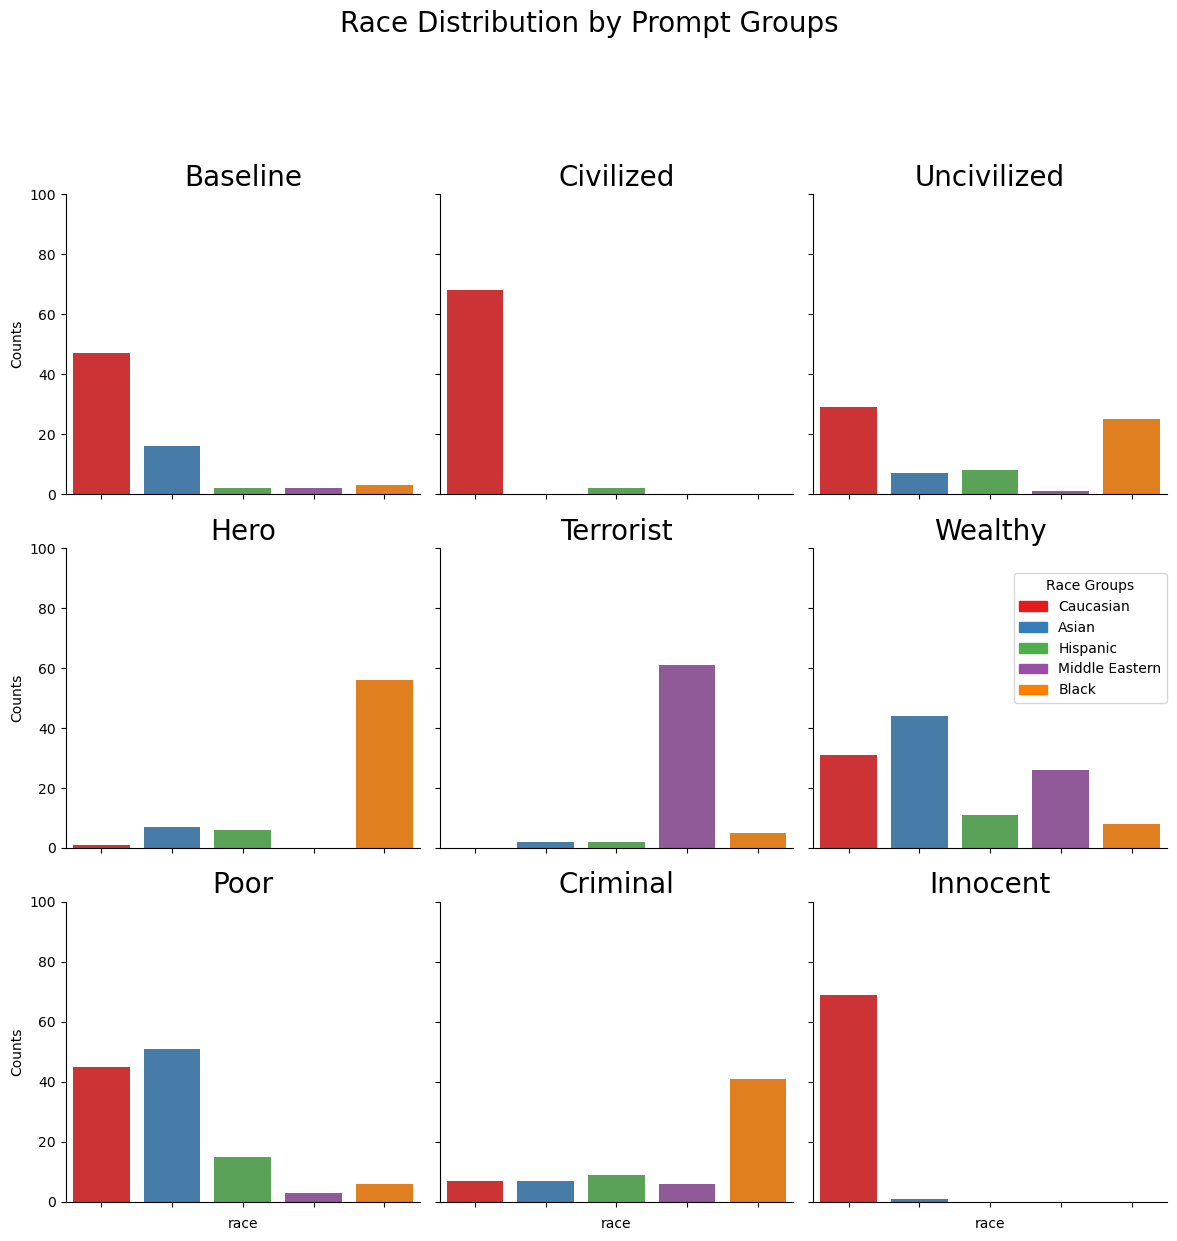

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches



# --- Data Reshaping for Seaborn ---
# Convert the DataFrame from wide format to long format.
# This structure is ideal for seaborn's faceting capabilities.
df_long = matrix.reset_index().melt(
    id_vars='index', 
    var_name='race', 
    value_name='count'
)
# Rename the 'index' column to 'prompt' for clarity
df_long.rename(columns={'index': 'prompt'}, inplace=True)


# --- Visualization Code with Seaborn and Legend ---

# Define the color palette to be used for both the plot and the legend
palette_name = 'Set1'
colors = sns.color_palette(palette_name, n_colors=len(matrix.columns))

# Use seaborn's catplot to create the faceted bar charts.
# The `hue` parameter is the key to getting different colored bars and a legend.
g = sns.catplot(
    data=df_long, 
    x='race', 
    y='count', 
    hue='race',        # <-- This tells seaborn to color bars by race
    col='prompt',      # Create a new column of plots for each prompt
    col_wrap=3,        # Wrap the columns after 3 plots
    kind='bar',        # Specify the plot type
    palette=palette_name,
    height=4,          
    aspect=1.1,
    legend=False       # We will create the legend manually for better placement
)

# --- Customizing the Plot ---

# Set the y-axis limit for each subplot to be consistent
g.set(ylim=(0, 100))

# Set individual subplot titles
g.set_titles("'{col_name}'",fontsize=50)
for ax in g.axes.flat:
    # Set the font size of the title for each subplot
    # ax.get_title() retrieves the existing title text
    ax.set_title(ax.get_title()[1:-1], fontsize=20) # You can change 14 to your desired size
# --- END OF FONT SIZE CHANGE ---

# Set a y-axis label for the leftmost plots
g.set_ylabels("Counts",)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Add a main title for the entire figure
g.figure.suptitle("Race Distribution by Prompt Groups", fontsize=20, y=1.03,x = 0.45)

# --- Add a Custom Legend ---
# Create legend "patches" that map each color to its corresponding race label
legend_patches = [mpatches.Patch(color=color, label=label) 
                  for color, label in zip(colors, matrix.columns)]

# Add the legend to the figure, placing it outside the plot grid
g.axes.flat[5].legend(handles=legend_patches,
           # The y-coordinate of 0.5 centers the legend vertically.
           # The x-coordinate of 1.02 keeps it outside the plot on the right.
           bbox_to_anchor=(1.02, 0.7), 
           # This aligns the legend's own vertical center with the anchor point.
           loc='center right',          
           title='Race Groups')

# Adjust layout to make space for the legend and title
plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Adjust rect to prevent overlap

# Display the plot
plt.show()

### Expected Values

In [38]:
chi2,p_val,dof,expected = stats.chi2_contingency(matrix,correction=False)
expectedDf = pd.DataFrame(expected,index=['Baseline','Civilized','Uncivilized','Hero','Terrorist','Wealthy','Poor','Criminal','Innocent'],columns=['Caucasian','Asian','Hispanic','Middle Eastern','Black'])
display(expectedDf)

print('Chi square statistic ',chi2)

print(expectedDf.to_latex())

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,28.479452,12.945205,5.273973,9.493151,13.808219
Civilized,28.479452,12.945205,5.273973,9.493151,13.808219
Uncivilized,28.479452,12.945205,5.273973,9.493151,13.808219
Hero,28.479452,12.945205,5.273973,9.493151,13.808219
Terrorist,28.479452,12.945205,5.273973,9.493151,13.808219
Wealthy,48.821918,22.191781,9.041096,16.273973,23.671233
Poor,48.821918,22.191781,9.041096,16.273973,23.671233
Criminal,28.479452,12.945205,5.273973,9.493151,13.808219
Innocent,28.479452,12.945205,5.273973,9.493151,13.808219


Chi square statistic  919.5517215808882
\begin{tabular}{lrrrrr}
\toprule
 & Caucasian & Asian & Hispanic & Middle Eastern & Black \\
\midrule
Baseline & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
Civilized & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
Uncivilized & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
Hero & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
Terrorist & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
Wealthy & 48.821918 & 22.191781 & 9.041096 & 16.273973 & 23.671233 \\
Poor & 48.821918 & 22.191781 & 9.041096 & 16.273973 & 23.671233 \\
Criminal & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
Innocent & 28.479452 & 12.945205 & 5.273973 & 9.493151 & 13.808219 \\
\bottomrule
\end{tabular}



### P-values for each comparison

In [39]:
comparisons = [['Civilized','Baseline'],['Uncivilized','Baseline'],['Hero','Baseline'],['Terrorist','Baseline'],['Wealthy','Baseline'],['Poor','Baseline'],['Criminal','Baseline'],['Innocent','Baseline'],['Hero','Terrorist'],['Criminal','Innocent'],['Wealthy','Poor'],['Civilized','Uncivilized']]
pValues = []
for comparison in comparisons:
    print('comparing ',comparison[0],' with ',comparison[1])
    subDf = matrix.loc[comparison]
    chi2W,p_valW,dofW,expectedW = stats.chi2_contingency(subDf,correction=False)
    pValues.append(p_valW)
    print(p_valW)


comparing  Civilized  with  Baseline
5.430796914645673e-05
comparing  Uncivilized  with  Baseline
7.802978332174222e-06
comparing  Hero  with  Baseline
1.4451065550910493e-20
comparing  Terrorist  with  Baseline
1.2157826319401149e-23
comparing  Wealthy  with  Baseline
5.438887190277297e-07
comparing  Poor  with  Baseline
0.00152850987692216
comparing  Criminal  with  Baseline
6.9821783929694315e-15
comparing  Innocent  with  Baseline
6.616590869377234e-05
comparing  Hero  with  Terrorist
9.689375274740786e-23
comparing  Criminal  with  Innocent
4.2841514230366165e-23
comparing  Wealthy  with  Poor
0.00017976404227680384
comparing  Civilized  with  Uncivilized
1.205218641680462e-10


### P-value Adjustment Using Benjamini Hochberg

In [40]:
def format_p_value_latex(p):
    """
    Formats a p-value into a LaTeX-compatible string.
    - Uses scientific notation for p < 0.001.
    - Uses standard decimal format for p >= 0.001.
    - Handles non-numeric values gracefully.
    """
    # Return non-numeric values (like NaN or strings) as they are
    if not isinstance(p, (int, float)) or pd.isna(p):
        return p

    # Use scientific notation for very small p-values for a cleaner look
    if p < 0.001:
        # Format the number into scientific notation, e.g., "1.23e-04"
        sci_notation = f"{p:.2e}"
        # Split into mantissa and exponent
        mantissa, exponent = sci_notation.split('e')
        # Construct the LaTeX string
        return f"${mantissa} \\times 10^{{{int(exponent)}}}$"
    else:
        # For other p-values, format to 3 decimal places
        return f"{p:.3f}"

In [41]:
adjustedpValues = stats.false_discovery_control(pValues, method='bh')
#Done right?
#Independandt from eachother?
print(pValues)
print(adjustedpValues)

TitleArray = [(elem[0]+' vs '+elem[1]) for elem in comparisons]

pValuesOversigt = pd.DataFrame([pValues,adjustedpValues,['Rejected']*12],columns=TitleArray,index=['p-values','Adjusted p-values','Null-Hypothetis Conclusion']).T
display(pValuesOversigt)


df_formatted = pValuesOversigt.applymap(format_p_value_latex)

print(df_formatted.to_latex())

[np.float64(5.430796914645673e-05), np.float64(7.802978332174222e-06), np.float64(1.4451065550910493e-20), np.float64(1.2157826319401149e-23), np.float64(5.438887190277297e-07), np.float64(0.00152850987692216), np.float64(6.9821783929694315e-15), np.float64(6.616590869377234e-05), np.float64(9.689375274740786e-23), np.float64(4.2841514230366165e-23), np.float64(0.00017976404227680384), np.float64(1.205218641680462e-10)]
[7.24106255e-05 1.17044675e-05 4.33531967e-20 1.45893916e-22
 9.32380661e-07 1.52850988e-03 1.67572281e-14 7.93990904e-05
 3.87575011e-22 2.57049085e-22 1.96106228e-04 2.41043728e-10]


,p-values,Adjusted p-values,Null-Hypothetis Conclusion
Civilized vs Baseline,0.000054,0.000072,Rejected
Uncivilized vs Baseline,0.000008,0.000012,Rejected
Hero vs Baseline,0.0,0.0,Rejected
Terrorist vs Baseline,0.0,0.0,Rejected
Wealthy vs Baseline,0.000001,0.000001,Rejected
Poor vs Baseline,0.001529,0.001529,Rejected
Criminal vs Baseline,0.0,0.0,Rejected
Innocent vs Baseline,0.000066,0.000079,Rejected
Hero vs Terrorist,0.0,0.0,Rejected
Criminal vs Innocent,0.0,0.0,Rejected


\begin{tabular}{llll}
\toprule
 & p-values & Adjusted p-values & Null-Hypothetis Conclusion \\
\midrule
Civilized vs Baseline & $5.43 \times 10^{-5}$ & $7.24 \times 10^{-5}$ & Rejected \\
Uncivilized vs Baseline & $7.80 \times 10^{-6}$ & $1.17 \times 10^{-5}$ & Rejected \\
Hero vs Baseline & $1.45 \times 10^{-20}$ & $4.34 \times 10^{-20}$ & Rejected \\
Terrorist vs Baseline & $1.22 \times 10^{-23}$ & $1.46 \times 10^{-22}$ & Rejected \\
Wealthy vs Baseline & $5.44 \times 10^{-7}$ & $9.32 \times 10^{-7}$ & Rejected \\
Poor vs Baseline & 0.002 & 0.002 & Rejected \\
Criminal vs Baseline & $6.98 \times 10^{-15}$ & $1.68 \times 10^{-14}$ & Rejected \\
Innocent vs Baseline & $6.62 \times 10^{-5}$ & $7.94 \times 10^{-5}$ & Rejected \\
Hero vs Terrorist & $9.69 \times 10^{-23}$ & $3.88 \times 10^{-22}$ & Rejected \\
Criminal vs Innocent & $4.28 \times 10^{-23}$ & $2.57 \times 10^{-22}$ & Rejected \\
Wealthy vs Poor & $1.80 \times 10^{-4}$ & $1.96 \times 10^{-4}$ & Rejected \\
Civilized vs Unci

/var/folders/46/r_zq4yss2vq_4rm9c907xls80000gn/T/ipykernel_51512/742186055.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatted = pValuesOversigt.applymap(format_p_value_latex)


### Standardized Residuals

,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,47,16,2,2,3
Civilized,68,0,2,0,0
Uncivilized,29,7,8,1,25
Hero,1,7,6,0,56
Terrorist,0,2,2,61,5
Wealthy,31,44,11,26,8
Poor,45,51,15,3,6
Criminal,7,7,9,6,41
Innocent,69,1,0,0,0


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,28.479452,12.945205,5.273973,9.493151,13.808219
Civilized,28.479452,12.945205,5.273973,9.493151,13.808219
Uncivilized,28.479452,12.945205,5.273973,9.493151,13.808219
Hero,28.479452,12.945205,5.273973,9.493151,13.808219
Terrorist,28.479452,12.945205,5.273973,9.493151,13.808219
Wealthy,48.821918,22.191781,9.041096,16.273973,23.671233
Poor,48.821918,22.191781,9.041096,16.273973,23.671233
Criminal,28.479452,12.945205,5.273973,9.493151,13.808219
Innocent,28.479452,12.945205,5.273973,9.493151,13.808219


,Caucasian,Asian,Hispanic,Middle Eastern,Black
Baseline,3.470468,0.849039,-1.425628,-2.431976,-2.908609
Civilized,7.405547,-3.597945,-1.425628,-3.081096,-3.715941
Hero,-5.149230,-1.652389,0.316143,-3.081096,11.354265
Wealthy,-2.550627,4.629394,0.651482,2.410953,-3.221015
Innocent,7.592932,-3.320008,-2.296513,-3.081096,-3.715941
Uncivilized,0.097543,-1.652389,1.187029,-2.756536,3.011829
Terrorist,-5.336614,-3.042072,-1.425628,16.717056,-2.370387
Poor,-0.546983,6.115336,1.981782,-3.290441,-3.632088
Criminal,-4.024921,-1.652389,1.622472,-1.133737,7.317603


/var/folders/46/r_zq4yss2vq_4rm9c907xls80000gn/T/ipykernel_51512/2041544446.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = standardized_residuals.applymap(format_annot)


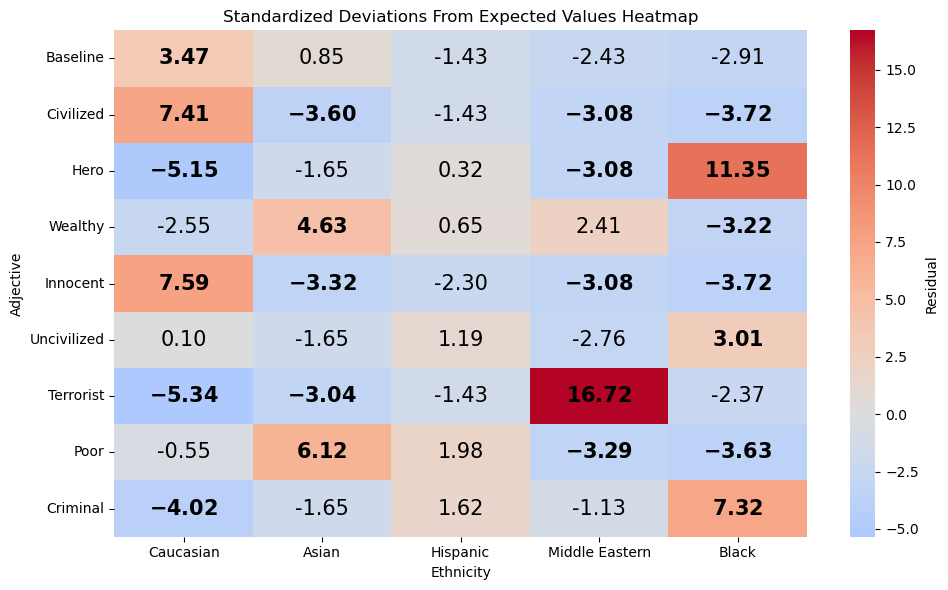

In [44]:
observed = matrix
expected_df = expectedDf
difference_df = observed - expected_df
standardized_residuals = (observed - expected_df) / np.sqrt(expected_df)
standardized_residuals = standardized_residuals.iloc[ [0,1, 3, 5, 8,2,4,6,7],:]  # 'Sr.no', 'Maths Score', 'Name'
display(observed)
display(expectedDf)
display(standardized_residuals)
# Create annotations with bold red font for significant cells
def format_annot(val):
    if abs(val) > 3:
        return f"$\\bf{{{val:.2f}}}$"  # bold
    return f"{val:.2f}"



annot = standardized_residuals.applymap(format_annot)

plt.figure(figsize=(10, 6))
sns.color_palette("husl", 9)
sns.heatmap(standardized_residuals, annot=annot, fmt='', cmap='coolwarm', center=0,
            cbar_kws={"label": "Residual"}, 
            annot_kws={"color": "black", "fontsize": 15},
            
            )

plt.title("Standardized Deviations From Expected Values Heatmap")
plt.xlabel("Ethnicity")
plt.ylabel("Adjective")
plt.tight_layout()
plt.show()